In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "sales_data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

### fillna is usefull to fill the missing value with the given values
#### inplace = True ensures that its changing in original file not creating a duplicate

In [6]:
df.fillna({'STATE' : 'UNKNOWN','POSTALCODE': 'Unknown', 'TERRITORY': 'Unknown', 'ADDRESSLINE2': 'Not Provided'}, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Total Revenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

In [9]:
df['Profit Margin (%)'] = (df['SALES'] - df['MSRP']) / df['SALES'] * 100

In [10]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Total Revenue,Profit Margin (%)
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551,2936.906408,96.779058
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000,482.130000,82.998854
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000,2100.000000,96.170393
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000,2800.000000,97.105610
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000,3726.810000,97.691757
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000,9048.160000,99.660494
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912,1105.644284,1.457130


In [11]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

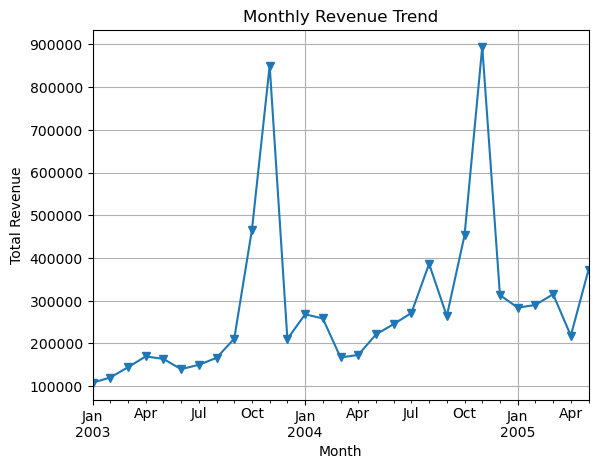

In [12]:
df.groupby(df['ORDERDATE'].dt.to_period('M'))['Total Revenue'].sum().plot(kind='line',marker='v')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_24484\1164154837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


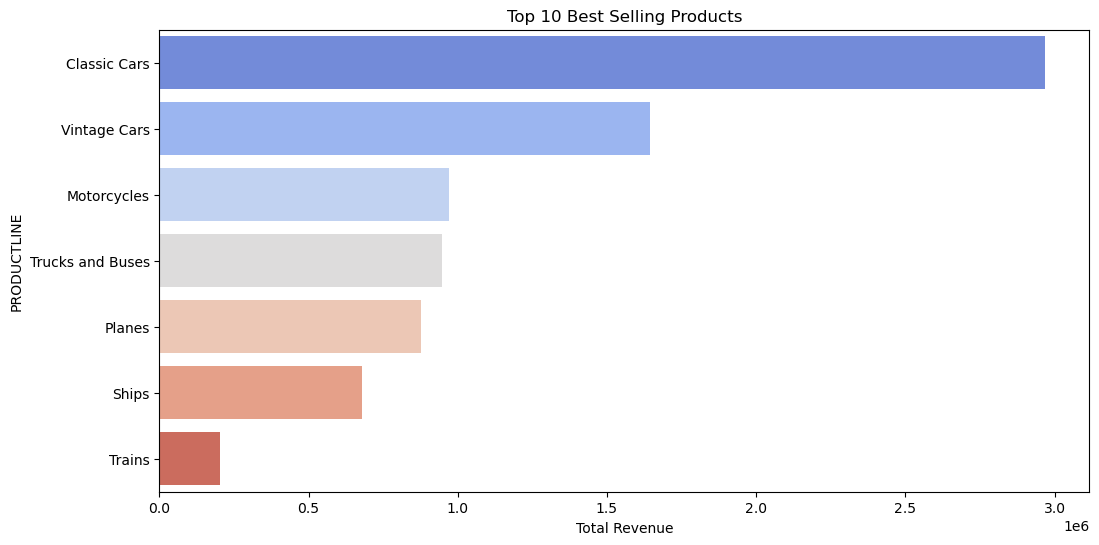

In [13]:
plt.figure(figsize=(12,6))
top_products = df.groupby('PRODUCTLINE')['Total Revenue'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Revenue")
plt.show()

In [14]:
customer_counts = df['CUSTOMERNAME'].value_counts()
new_c = (customer_counts == 1).sum()
rep_c = (customer_counts > 1).sum()

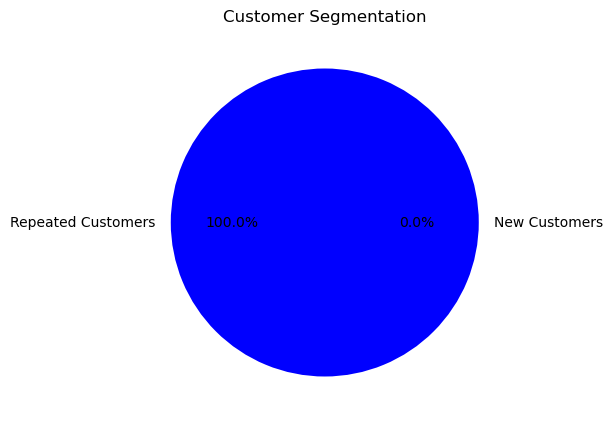

In [15]:
plt.figure(figsize=(10,5))
plt.pie([new_c, rep_c], labels=['New Customers', 'Repeated Customers'], colors=['orange', 'blue'],  autopct='%1.1f%%')
plt.title("Customer Segmentation")
plt.show()

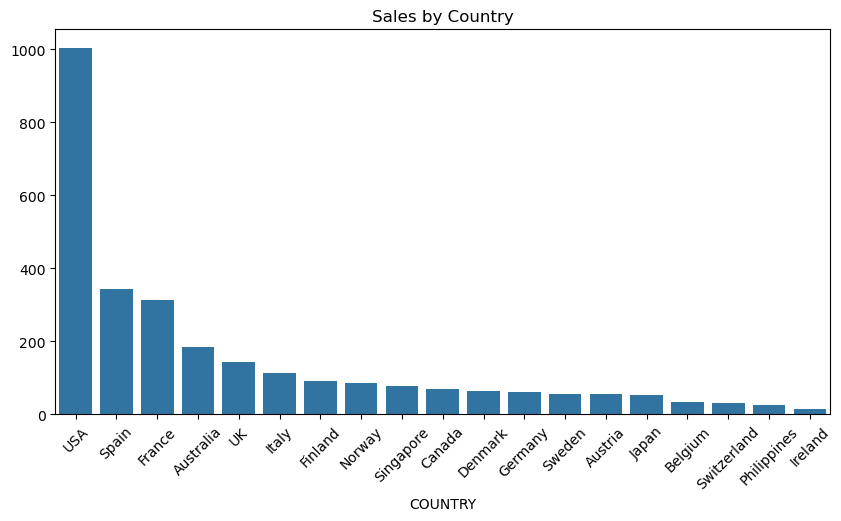

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['COUNTRY'].value_counts().index, y=df['COUNTRY'].value_counts().values)
plt.title("Sales by Country")
plt.xticks(rotation=45)
plt.show()

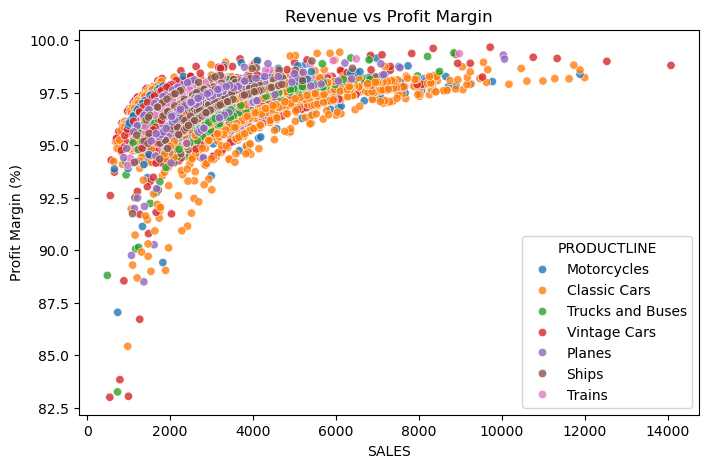

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['SALES'], y=df['Profit Margin (%)'], hue=df['PRODUCTLINE'], alpha=0.8)
plt.title("Revenue vs Profit Margin")
plt.show()

In [18]:
df['Monthly Sales'] = df.groupby(df['ORDERDATE'].dt.to_period('M'))['Total Revenue'].transform('sum')
df['Sales Moving Avg'] = df['Monthly Sales'].rolling(window=3).mean()